# BL40A2030 Wireless Communication Networks

## Week 3: Performance analysis

## Author: Pedro Nardelli

### References 

#### Markdown syntax for writing in the notebook

[Markdown syntax](https://help.github.com/articles/basic-writing-and-formatting-syntax/)

#### Library for numerical calculation in Python

[Numpy](http://www.numpy.org/)

#### Satistical functions

[scipy.stats](Statistical functions)

#### Plot in Python

[Matplotlib](https://matplotlib.org/tutorials/introductory/pyplot.html)

#### Queue system in Python

[queue](https://docs.python.org/3/library/queue.html)

#### Library for symbolic calculation
[Sympy basics](https://www.scipy-lectures.org/packages/sympy.html)
[Sympy documentation](https://docs.sympy.org/latest/index.html)

In [1]:
! pip install sympy

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import sympy as sp
import numpy as np 
import scipy.stats as ss
import matplotlib.pyplot as plt
import queue
import copy
from matplotlib import style
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

## M/M/1 vs. M/M/1/k queues: What is the impact of limited queue size?

### M/M/1 queue

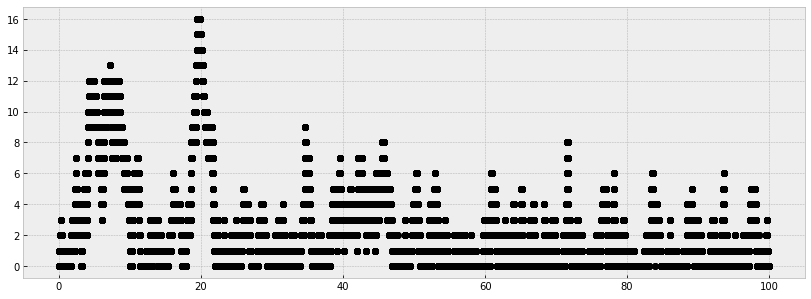

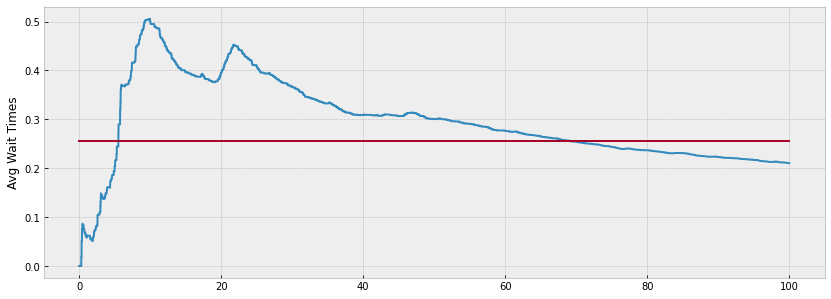

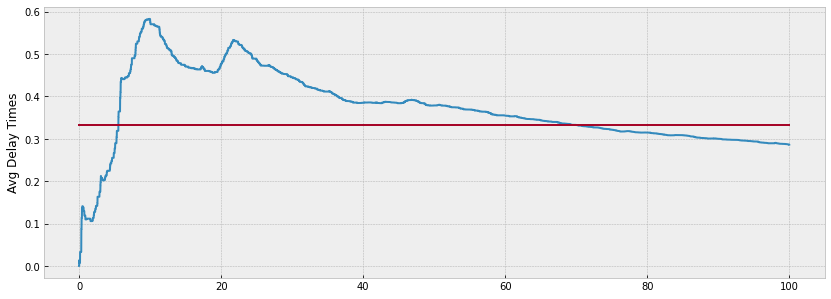

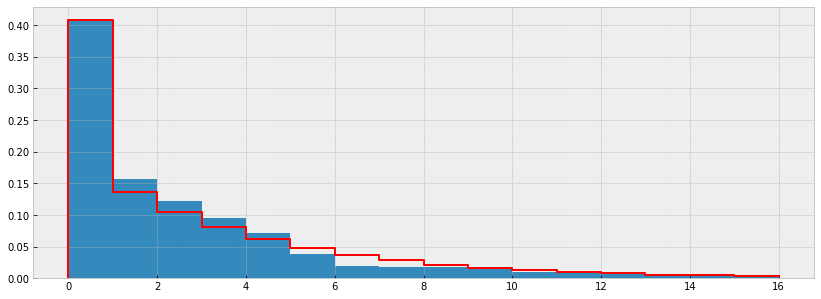

Idle ratio: 0.2273388888888889
Empty queue probability: 0.23076923076923073
Wait time in queue 0.25641025641025644
Delay time in system 0.33333333333333337


In [3]:
# Input Parameters -- Long one
total_time = 100 #hours
IAT_rate = 10 #elements arriving/hour
ST_rate = 13  #elements served/hour
rho = IAT_rate/ST_rate


# Initialize Parameters
qu = queue.Queue()
curr_process = None
IAT = []
ST = []
AT = []
wait_time = []
server_busy = False
list_wait = []
list_delay = []
num_processes_served=0

IAT.append(0)
i=1
while np.sum(IAT) < total_time*60*60 :
    i = i + 1
    temp = np.random.exponential(1/IAT_rate)*60*60
    IAT.append(int(temp - temp%1))
num_processes = i
        
# Populate Service-Times (ST) (where ST[i]!=0)
while not len(ST) == num_processes:
    temp = np.random.exponential(1/ST_rate)*60*60
    if not int(temp- temp%1)<1:
        ST.append(int(temp - temp%1))

# Save a copy of ST
ST_copy = copy.deepcopy(ST)

# Get Arrival-Times (AT) from IAT starting at t=0
# and initialize Waiting-Times to 0
for i in range(num_processes):
    if i == 0:
        AT.append(0)    
    else:
        AT.append(AT[i-1] + IAT[i])
    wait_time.append(0)

# Simulation of M/M/1 Queue (i represents current time)
queue_size = np.zeros(total_time*60*60)
empty_system=0

for i in range(total_time*60*60):
    queue_size[i] = qu.qsize()
    if server_busy:
        for item in list(qu.queue):
            wait_time[item] = wait_time[item] + 1
        ST[curr_process] = ST[curr_process] - 1
        if ST[curr_process] == 0:
            server_busy = False
            num_processes_served = num_processes_served + 1

    for j in range(num_processes):
        if i== AT[j]:
            qu.put(j)

    if not server_busy and not qu.empty():
        curr_process = qu.get()
        server_busy = True
    #after some transitory
    if not server_busy and qu.empty():
        empty_system = empty_system+1


    sum_wait = 0
    sum_delay = 0
    for i in range(num_processes_served):
        sum_wait = sum_wait + wait_time[i]
        sum_delay = sum_delay + wait_time[i] + ST_copy[i]
    
    if num_processes_served == 0:
        list_wait.append(0)
        list_delay.append(0)
    else:
        list_wait.append(sum_wait/(num_processes_served*60*60))  
        list_delay.append(sum_delay/(num_processes_served*60*60))

###Analytical
QWT = 1/((1-rho)*ST_rate) - 1/ST_rate
WT = 1/((1-rho)*ST_rate) 

  
time_hours = np.linspace(0,total_time,total_time*60*60)
    
plt.figure(figsize=(14,5))
#plt.plot( arrival, 'o',label='Arrival')
#plt.plot( service, 'x',label='Sevice')
plt.plot(time_hours,queue_size, 'ok')

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_wait)
plt.plot([0, total_time], [QWT, QWT])
plt.ylabel("Avg Wait Times")
plt.show()

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_delay)
plt.plot([0, total_time], [WT, WT])
plt.ylabel("Avg Delay Times")
plt.show()

plt.figure(figsize=(14,5))
n_bins = np.max(queue_size)
##
plt.hist(queue_size,n_bins.astype(int),density=True)
x = np.arange(0, n_bins+1)
p_analytical = (1-rho)*rho**x
p_analytical[1]= p_analytical[0] + p_analytical[1]
p_analytical[0]= 0
plt.step(p_analytical,'r')
plt.show()

print('Idle ratio:',empty_system/(total_time*60*60))
print('Empty queue probability:', 1 -  rho)
print('Wait time in queue',QWT)
print('Delay time in system',WT)

### M/M/1/k (considering k=5)

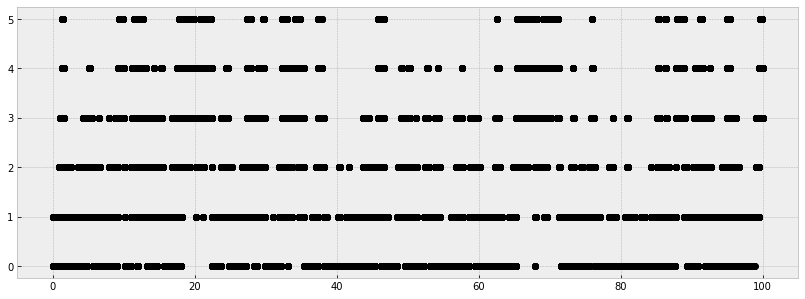

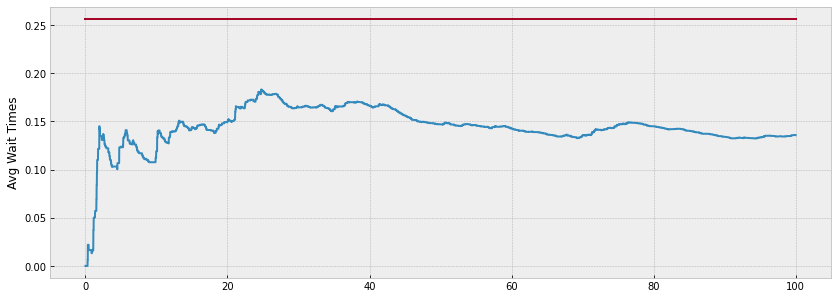

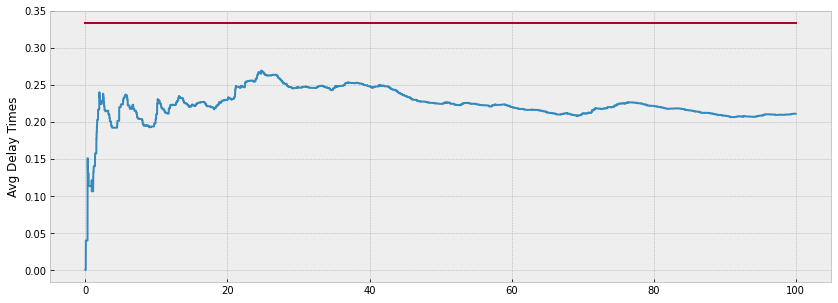

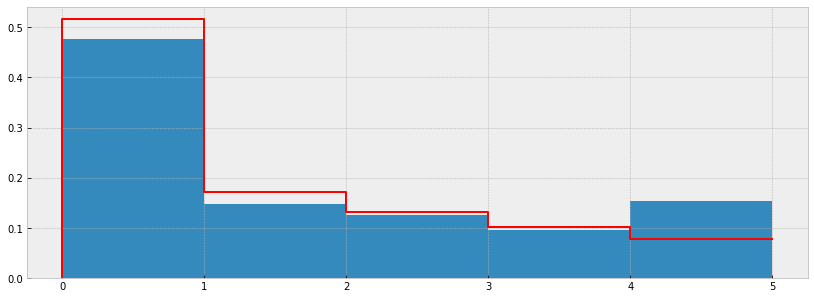

Idle ratio: 0.27882222222222225
Empty queue probability: 0.23076923076923073
Blocked probability (analysis): 0.07839429665812955
Blocked probability (numerical): 0.07101167315175097
Wait time in queue 0.25641025641025644
Delay time in system 0.33333333333333337


In [4]:
#M/M/1/k
# Input Parameters -- Long one
total_time = 100 #hours
IAT_rate = 10 #elements arriving/hour
ST_rate = 13  #elements served/hour
rho = IAT_rate/ST_rate
size_limit=5 # this is k (size limit of the queue)


# Initialize Parameters
qu = queue.Queue(maxsize=size_limit) ## this is how you set the size of the queue
curr_process = None
IAT = []
ST = []
AT = []
wait_time = []
server_busy = False
list_wait = []
list_delay = []
num_processes_served=0
blocked = 0 ## monitoring the number of blocked arrivals (i.e. arrivals when queue is full)

IAT.append(0)
i=1
while np.sum(IAT) < total_time*60*60 :
    i = i + 1
    temp = np.random.exponential(1/IAT_rate)*60*60
    IAT.append(int(temp - temp%1))
num_processes = i
        
# Populate Service-Times (ST) (where ST[i]!=0)
while not len(ST) == num_processes:
    temp = np.random.exponential(1/ST_rate)*60*60
    if not int(temp- temp%1)<1:
        ST.append(int(temp - temp%1))

# Save a copy of ST
ST_copy = copy.deepcopy(ST)

# Get Arrival-Times (AT) from IAT starting at t=0
# and initialize Waiting-Times to 0
for i in range(num_processes):
    if i == 0:
        AT.append(0)    
    else:
        AT.append(AT[i-1] + IAT[i])
    wait_time.append(0)

# Simulation of M/M/1 Queue (i represents current time)
queue_size = np.zeros(total_time*60*60)
empty_system=0

for i in range(total_time*60*60):
    queue_size[i] = qu.qsize()
        
    if server_busy:
        for item in list(qu.queue):
            wait_time[item] = wait_time[item] + 1
        ST[curr_process] = ST[curr_process] - 1
        if ST[curr_process] == 0:
            server_busy = False
            num_processes_served = num_processes_served + 1

    for j in range(num_processes):
        if i== AT[j]:
            if qu.qsize() == size_limit:
                blocked = blocked + 1
            else:
                qu.put(j)

    if not server_busy and not qu.empty():
        curr_process = qu.get()
        server_busy = True
    #after some transitory
    if not server_busy and qu.empty():
        empty_system = empty_system+1


    sum_wait = 0
    sum_delay = 0
    for i in range(num_processes_served):
        sum_wait = sum_wait + wait_time[i]
        sum_delay = sum_delay + wait_time[i] + ST_copy[i]
    
    if num_processes_served == 0:
        list_wait.append(0)
        list_delay.append(0)
    else:
        list_wait.append(sum_wait/(num_processes_served*60*60))  
        list_delay.append(sum_delay/(num_processes_served*60*60))

###Analytical
QWT = 1/((1-rho)*ST_rate) - 1/ST_rate
WT = 1/((1-rho)*ST_rate) 

  
time_hours = np.linspace(0,total_time,total_time*60*60)
    
plt.figure(figsize=(14,5))
#plt.plot( arrival, 'o',label='Arrival')
#plt.plot( service, 'x',label='Sevice')
plt.plot(time_hours,queue_size, 'ok')

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_wait)
plt.plot([0, total_time], [QWT, QWT])
plt.ylabel("Avg Wait Times")
plt.show()

plt.figure(figsize=(14,5))
plt.plot(time_hours, list_delay)
plt.plot([0, total_time], [WT, WT])
plt.ylabel("Avg Delay Times")
plt.show()

plt.figure(figsize=(14,5))
n_bins = np.max(queue_size)
##
plt.hist(queue_size,n_bins.astype(int),density=True)
x = np.arange(0, n_bins+1)
p_analytical = np.zeros(n_bins.astype(int)+1)
for i in range(n_bins.astype(int)+1):
    if not i > size_limit:          
        p_analytical[i] =(1 -  rho)* (rho**i)/(1-rho**(size_limit+1))
        
p_analytical[1]= p_analytical[0] + p_analytical[1]
p_analytical[0]= 0
plt.step(p_analytical,'r')
plt.show()

print('Idle ratio:',empty_system/(total_time*60*60))
print('Empty queue probability:', 1 -  rho)
print('Blocked probability (analysis):', (1 -  rho)* (rho**size_limit)/(1-rho**(size_limit+1)))
print('Blocked probability (numerical):', blocked/num_processes)
print('Wait time in queue',QWT)
print('Delay time in system',WT)

#### Try yourself by changing the limit size of the queue

### Difference of Deterministic, Exponential and Erlang service times

- Arrival rates: $\lambda = 1$ 
- Plot expect time in the queue system as a function of $\mu$ (service rate) for the two processes
- $k=2, 4$ for Erlang

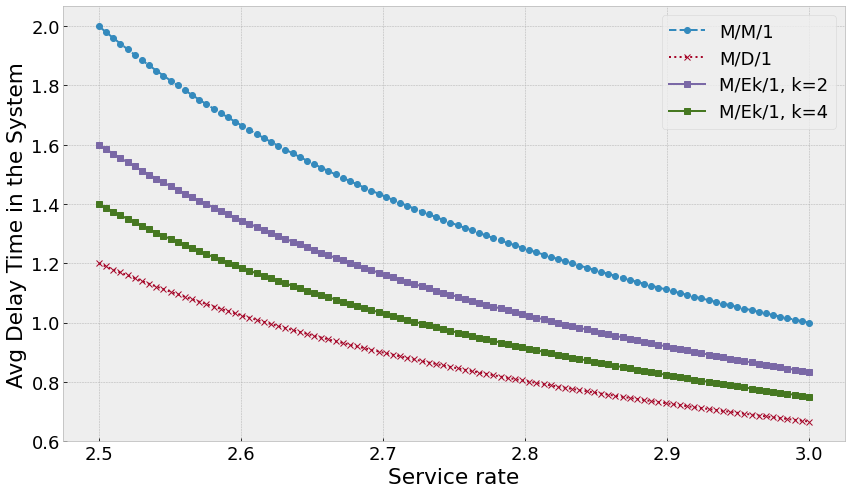

In [5]:
plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 18})
#
AR =2
SR = np.linspace(AR+0.5, 3 , 100)
UT = AR/SR
## M/M/1
Delay_mm1 = 1/(SR*(1-UT))
plt.plot(SR,Delay_mm1,'o--',label='M/M/1')
## M/M/1
Delay_md1 = 1/SR + UT/(2*SR*(1-UT))
plt.plot(SR,Delay_md1,'x:',label='M/D/1')
## M/Ek/1
#
k=2
Delay_mek1_k2 = (1+k)/(k) * UT/(2*SR*(1-UT)) + 1/SR
plt.plot(SR,Delay_mek1_k2,'s-', label='M/Ek/1, k=2')
#
k=4
Delay_mek1_k4 = (1+k)/(k) * UT/(2*SR*(1-UT)) + 1/SR
plt.plot(SR,Delay_mek1_k4,'s-',label='M/Ek/1, k=4')
#
plt.xlabel("Service rate")
plt.ylabel("Avg Delay Time in the System")
plt.legend()
plt.show()

#### Try with different arrival rates (remember that arrival rates must be lower than the service rate to guarantee convergence)

### Queue system with feedback - [Sec. 4.10.2, 3]

![image.png](attachment:image.png)


Solution: $$\lambda_1 = \lambda + \lambda_1 p \Rightarrow \lambda_1 = \dfrac{\lambda}{1-p}$$

#### What is the impact of the feedback (some elements that do not leave the queue system after being served with probability $p$?

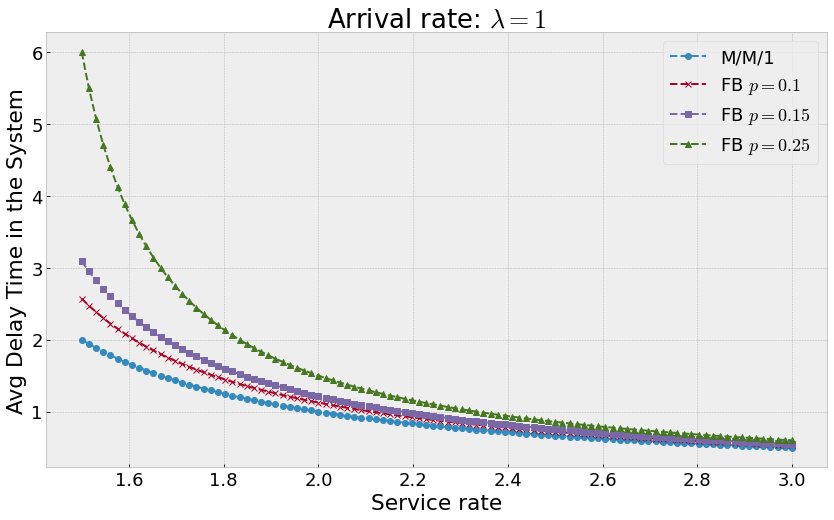

In [6]:
plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 18})
#
AR =1
SR = np.linspace(AR+0.5, 3 , 100)
UT = AR/SR
## M/M/1
Delay_mm1 = 1/(SR*(1-UT))
plt.plot(SR,Delay_mm1,'o--',label='M/M/1')
## M/M/1 with feedback
p=0.1
AR =1/(1-p)
UT = AR/SR
Delay_mm1 = 1/(SR*(1-UT))
plt.plot(SR,Delay_mm1,'x--',label='FB $p=0.1$')
## M/M/1 with feedback
p=0.15
AR =1/(1-p)
UT = AR/SR
Delay_mm1 = 1/(SR*(1-UT))
plt.plot(SR,Delay_mm1,'s--',label='FB $p=0.15$')
#
## M/M/1 with feedback
p=0.25
AR =1/(1-p)
UT = AR/SR
Delay_mm1 = 1/(SR*(1-UT))
plt.plot(SR,Delay_mm1,'^--',label='FB $p=0.25$')
#
plt.title("Arrival rate: $\lambda=1$")
plt.xlabel("Service rate")
plt.ylabel("Avg Delay Time in the System")
plt.legend()
plt.show()

#### Try to change the probabilities and the arrival rate.

## Pure ALOHA

- Find the value of transmission attempts $G$ per packet time that optimazes the throughput $S$ point using sympy

In [7]:
# Visualization for sympy
sp.init_printing() 

In [8]:
#Define a varible in sympy
G = sp.symbols('G')

In [9]:
S = G * sp.exp(-2*G)
S

The optimal point is the solution of $\dfrac{\mathrm{d}S}{\mathrm{d}G} = 0$ in terms of $G$.

In [10]:
diff_S= sp.diff(S,G)
diff_S

In [11]:
opt_G = sp.solve(diff_S, G)
opt_G[0] # solution comes as an array, need to get the first element

In [12]:
opt_S = S.subs(G,opt_G[0])
opt_S

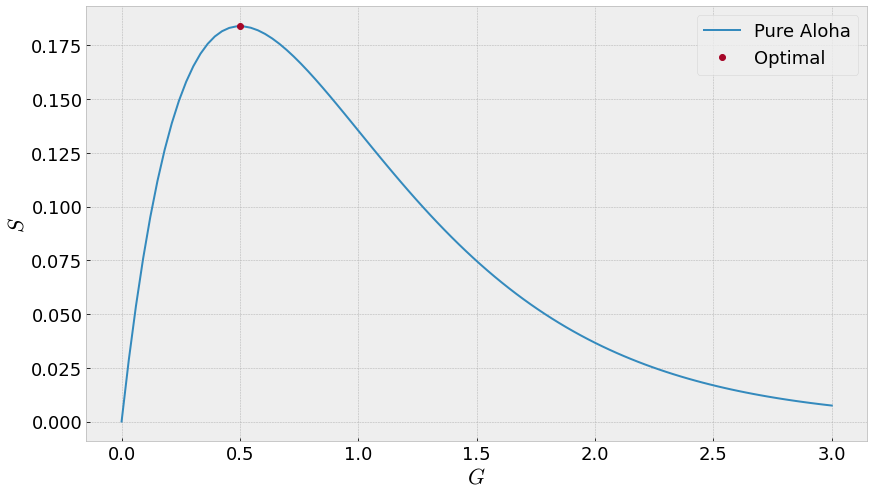

In [13]:
#Plotting using numpy
plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 18})
#
num_G = np.linspace(0, 3 , 100) 
num_S = num_G * np.exp(-2*num_G)
opt_G = 1/2
opt_S = 1/2 * np.exp(-1) 
#
plt.plot(num_G, num_S,'-',label='Pure Aloha')
plt.plot(opt_G, opt_S,'o',label='Optimal')
#
plt.xlabel("$G$")
plt.ylabel("$S$")
plt.legend()
plt.show()

#### Try to plot this with Slotted Aloha

### Plotting [Aloha vs. CSMA](http://www.cs.jhu.edu/~cs647/mac_lecture_2.pdf)

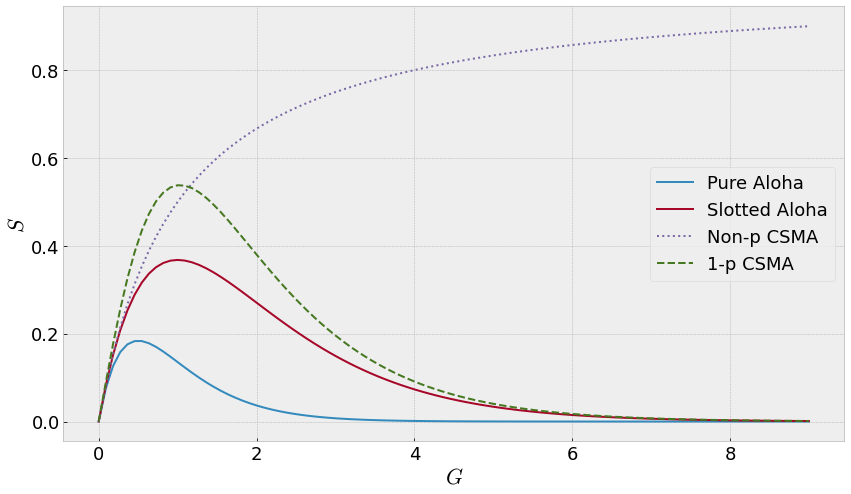

In [14]:
#Plotting using numpy
plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 18})
####
#Pure aloha
num_G = np.linspace(0, 9 , 100) 
num_S = num_G * np.exp(-2*num_G)
#
plt.plot(num_G, num_S,'-',label='Pure Aloha')
####
#Slotted aloha
num_S = num_G * np.exp(-num_G)
#
plt.plot(num_G, num_S,'-',label='Slotted Aloha')
###
#Non-p CSMA ## 
num_S = (num_G)/(1+num_G)
#
plt.plot(num_G, num_S,':',label='Non-p CSMA')
####
##1-p CSMA
num_S = (num_G + num_G**2)/(1+num_G*np.exp(num_G))
#
plt.plot(num_G, num_S,'--',label='1-p CSMA')
#
#
plt.xlabel("$G$")
plt.ylabel("$S$")
plt.legend()
plt.show()

### Think about why the performance of the system

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9f158e8f-b2ef-40e1-a68d-79becf52b0a0' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>